In [93]:
#conda install -c pytorch pytorch
#conda install -c "conda-forge/label/cf202003" transformers

#pytorch , transformer installation in anaconda(already installed)
data2 = panda.read_csv("HateSpeechData.csv")
data2

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [23]:
# Using BERT Model by Meta for Twitter Analysis

# It may takes 30 mins for this cell to load completely as tensors complete their work in transformer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


# precprcessing tweet taking each tweet and splitting it into a list of strings
tweet = data2['tweet']
tweeter = []
for x in tweet:
    tweet_words = []
    for word in x.split(' '):
        if word.startswith('@') and len(word) > 1:   #BERT needs to convert @<name> to @ user
            word = '@user'
        elif word.startswith('http'):
            word = "http"
        tweet_words.append(word)
    
    tweet_proc = " ".join(tweet_words)
    tweeter.append(tweet_proc)
                        
for twet in tweeter:
    print(twet)


# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)  #using the model for sentiment analysis
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

# sentiment analysis


l2 = []  #list to store labels of each tweet generated by BERTA
for twet in tweeter:
    encoded_tweet = tokenizer(twet, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)   # softmax converts the dictionary given by the transformer into probabalities of labels
    scores2 = scores.tolist()
    l = labels[scores2.index(max(scores2))]   # storing the maximum probabilty from the list and assigning corr. label
    print(l)  # printing each label
    l2.append(l)
        
data2['bertalabel'] = l2  # adding the BERTA label column to our dataset

data2.head(10)  #printing the dataset
    


!!! RT @user As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
!!!!! RT @user boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
!!!!!!! RT @user Dawg!!!! RT @user You ever fuck a bitch and she start to cry? You be confused as shit
!!!!!!!!! RT @user @user she look like a tranny
!!!!!!!!!!!!! RT @user The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"
!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
" &amp; you might not get ya bitch back &amp; thats that "
" @user :hobbies include: fighting Mariam"

bitch
" Keeks is a bitch she curves every

&#8220;@HeyKeifer: Oreos are basically dirt circles with cream.&#8221; True.
&#8220;@Hi__________Bye: Damn this bitch always gets hit on by The
 hottest guys n makes them feel stupid @user i got called an ego kill
&#8220;@HighClassCapri: @user lmao I minds well be a hoe for all that &#128528;&#8221;&#128563;&#128563; I ain't mean like that girl lol
&#8220;@HighClassCapri: @user lmao definitely not &#127814;&#8221;&#128553;&#128553;&#128553; I was bout to say don't front bitch that shit a freeway
&#8220;@HighClassCapri: @user no bitch hurry up lol&#8221;im so hungry I can't focus&#128553;
&#8220;@HighClassCapri: @user ohhhhh yes bitch yesss&#8221;u ready T?&#128527;&#128520;
&#8220;@HighClassCapri: @user woke up and bitches was not here lol&#8221;I wasn't angry wit my hoes&#128514;
&#8220;@HighClassCapri: Ima show my ass tonight, I can feel it &#128586;&#8221;omgggg I was thinking the same shit bitch&#128553;&#128553;
&#8220;@Highfromthe90s: A lot of women who claim they are yellow are 

' Niggah said " my girl off limits thirsty niggahs stay out her inbox " But the bitch look like Kunta Kintes... http
' Niggahs stay thinkin I want they girl &#1041204;&#1041204;&#1041204;&#1041204;&#9995; Not nevvvvva niggah .
' No FEELINS for a hoe that ain't ma main thang , ma niggahs on the same thang &#1043359; all ma niggahs gangbang ,... http
' O M G you like stop controllin me , I'm like bitch fuck you thought ? She like niggah fuck you mean !
' Ok ma Texas bitch keep textin me , callin cryin stressin me &#1041190; Bout where I been but I been with another bitch allegedly &#1043351;&#1043360; .
' Ok my Texas bitch keep textin me , callin cryin stressin me , askin me about where I been but I been with another bitch allegedly &#1043359; .
' On twitter say she ridin for a niggah &#1041219;&#1043215; . That's why I really fuck with her , she down to pull the trigger &#1041653;&#1043359; .
' R.I.P Deshawn &#1041243; . I don't know him but I know a darkskin niggah in the hood named De

@user hahahaha youza fuck wigger
@user trash
@user @user @user @user @user @user aids fuck? Smdh u punk bitch.
@user ahh I see, I'm still a rook about the knowledge of THE hoe. But I'm progressing.
@user you&#8217;re a little bitch x2
@user "leave you beaner retard"
@user I ain't light skin nigga I'm even colored lmao
@user nigga I talk shit period this ain't nun new white bitch we go threw this every damn day &#128514;&#128514;
@user u a bitch in niggas clothing shut yo ass up &#128514;&#128514;&#128514;&#128514;&#128514;
@user peckerwood
@user he's a greaser
@user For the record #NoHomo but don't care who is unless I gotta see it.. same with every sexuality even birds, dogs.. what not.
@user @user 
I likes me dem Mexican hoes. Day suck me off for 5 dollas
@user I was bout to smack a bitch.
@user bro this bitch really stood there and was like you gonna give me my penny?
@user exception for Gilda Radner that bitch was funny
@user @user @user You're still a bitch
@user Them stop being a

@user @user fucking stupid crackers
@user @user fucking creepy ass nigguh lmao
@user @user @user your getting blocked faggot
@user I like brownies &#128546;
@user SOO when we hanging out and makin brownies!!
@user basically we're mad at them for being hoes
@user lmaoo you're the pussy who will call the cops. Also if I wanted to find yu I would. But I'm not gonna waste my time with you
@user you women. And when you getting money the hoes gone come so how does that sound gay ? Rather make money anyday
@user Yeah them hoes straight ima grab that light blue pair
@user @user not dykes or anything&#128111;&#128539;&#128109;
@user just like a nig to come home when ever they want
@user no one cares nigger
@user to late niggers died first
@user what's up nigger &#128513;
@user @user idk who gave that bitch my name
@user this bitch not tellin me
@user white bitch?
@user bitch get yo duck ass off my shit
@user lemme just throw a 302 in it, how's the tranny??
@user @user @user look at this nigger 

@user At the peak of the war W joins the Texas natl guard to get outta Nam. Facts are a bitch. http
@user lol bitch nigga ima get my gay homies on you
@user @user "bitch"
@user thats trash, its ot?
@user btw Jim crow laws were supported by democrats not republicans and MLK was a republican #Fact
@user yes das def da problem.if his.teacher was a spear chucker he woulda gt both dose rite
@user @user So you support "illegals" coming here and spreading disease among Americans Dream that bitch!
@user @user a judge that was appointed by obama who here doesnt see the agenda fucking crooked bitch
@user hey Windy! Does your dildo take out the trash for you? Buzzzzz
@user msnbc the same MSM who said blocking flights from africa is racist yea right No ID no vote bitch gold digger
@user your 30 second add just ruined it. A new low picking on a cripple
@user says the pedophile promoting dolt. LMAO #teabagger
@user faggot
@user what'd the note say? "Stop being a bitch, here's some flowers. &lt;3" ge

@user did you make an animal cracker taco
@user is it full of niggers
@user @user @user @user lmaoooo that hoe look like &#128058;
@user @user @user @user naw he should drop that bitch off in south Dallas with the rest of the homeless dogs
@user @user @user @user tell me this nigga ain't purple then a bitch nigga not black http
@user @user @user Mammy push you out and had a white baby like a bitch
@user @user @user @user big bro thought he was on house party's pajama jam like a bitch http
@user like bitch and a gram
@user lol I would've beat that hoe up
@user yeah man all my niggas dipped to the cars and left and I was in a barn getting chased by the ghetto bird
@user young thug ain't earn his strips yet lol just a few 2k14 bangers. Wiz can do dat cuz he not a lil nigguh of the rap game lol
@user @user @user I just don't wanna get looked at funny when I say nigger in public...
@user @user basically any foams over a 8 ugly... All dem bitches look big long an floppy (nh)
@user @user @use

@user I live in the eye of a white trash hurricane. Milwaukie OR. Where people use bikes BC of DUI's not to save the environment.
@user or jim crow laws segregation lynching laws... anti womans suffrage laws... amazing how everyone doesnt want to bring that up
@user drive you nigger
@user speaking about me all the time tryna make me look bad like you wasn't just eating my pussy .
@user What else do you expect from that nigger lover?
@user @user @user you guys are pussies
@user @user thats life hoes gonna be hoes an you could blame Tammy
@user birds of a feather..
@user I'll show you how much of a fag I am &#128527;
@user an coaches dont put them in positions to be successful, the offensive struggles can all be put on gardner, program is trash
@user wow. Thats great language coming from a HS coach, you sure are a role model, you're trash, just like your account
@user lookin good mick!
@user shut your dirty dirt trap you limp knees, ashy footed, blue balls, isolated hamster wheel, no nip

ATTENTION! Leggings ain't for everybody. Especially you hippo looking hoes!
ATTN : All Brown University students, the stop and frisk protesters will be systematically dispersed into random U.S. ghettos. Good luck.
Abby doesnt understand how beautiful she is, bitch you is straight up trippin. You know guys be droolin boutchu. Dont play. Lmao
Abed and I are gonna retire in Florida and get all the bad bitches in the nursing home.
Abed looks like he has to take a shit #bro #pic #brolic #boyswhotakepicsinsuits #tie #swag #hoes #on #us http
About all u can expect from a nicca that can barely talk! Lmao RT @user @user dude can't spell worth shit yo lol
About to be 23. Officially an old ass bitch
About to go watch dis bitch birth the devil #kinky @user
About to smack some peckerwoods in a Judge pit
Absolutely absurd that they even had to think about that call. #joke #zebras
Accept your flaws and imperfections because that's what makes you, YOU! See I'm a fuck, small dick faggot with parents wh

Cuz if it's trash I'm bashing it at saying he need to go back to jail
Cuz its 187 how im killin these hoes
Cuz pussy's only pussy man i get it when i need it
Cuz they dont wanna b saved RT @user Why is saving hoes bad?
Cuz u a hoe
Cuz you a hoe RT @user fair exchange &#8220;@ItsElmosWorld: yall have sex with a dude then he buy you a bag or pay your rent, whats that?&#8221;
DCC bitches knocked out on the grass
DEREK JETER clap clap clapclapclap #Yankees
DIVERSITY: Chcgo Blck Pstr Flooded w/ Dth Threats Ovr Endorsement Of GOP Candidate: &#8220;U Sellout Uncle Tom Ass N*gger&#8221; http
DMV nigguh dress funny as hell
DO IT DO IT! You'll still e a fag but do it(: &#8212; I'll pass Heidi. ;) http
DRUGS&gt; Is why #Giants are losing. Just ask #barrybonds and the HEDGE BET FUND&gt; #WorldSeriesGame6 #faggots
Da bitch mouf was smellin like da porta potties at da mustang field &#128514;&#128514;&#128514;
Da fuq ho
Da house next door to me been sold to honkies
Daaamn lmao right back to them old 

Faded, swear to god I'm faded.. my bitch educated had her clients pay the payment
Faggot ass bitch nigga
Fairy Tale Hat - free crochet pattern for child and adult at http http
Fairy tale world lmao
Fake ass hoes all around
Fake ass people. That's why I don't have no respect for em. Frontin ass bitches too
Fake niccas ain't far dog they right in ya face!
Fake tits? &#8220;@VelvetHoopD: A hoe??&#8220;@Steph_Badd: Can u guess what I was ? &#8220;@DJZeeti: Twitpic your halloween costumes&#8221; http
Falls in that pussy like quick sand &#128524;
False start bitches
Fam. &#8220;@1800deeznuts: Telling bitches you're sterile so you can hit em raw &gt;&gt;&gt;&gt;&gt;&gt;&#8221;
Famous women be the biggest hoes.
Fantasy squad doing so trash :/
Fat Trel that niggah &#128076;
Fat ass hoe holding up the machine
Fat ass inbred rednecks like Paula Deen are breed that are going extinct. I mean look at that woman, I would hate to be her scale.
Fat bitch
Fat bitches Twitter names be " PrincessCookieNec

How the hell was David Murphy's hit not a home run?! Clearly over the yellow line. @user another umpire mess up.... Smh
How this ugly ass nigga gets more pussy than me ?
How u know u dont get real life pussy. Only carin bout her enterin your DMs 
RT @user She can enter my DMs anytime http
How y'all associate or even entertain that bitch ass nigga is beyond my comprehension
How you cry like a bitch every time me other Chiefs fans have friendly debates?????
How you fucc for cash but u not a hoe ???? And how I'm going to respect u if your poccets broke ??????
How you gone wife a bitch that let niggas lick on her head in public?
How you gonna use my name while you talmbout pussy tastes? lol
How you just gon start some mess and try to break up that man home? For 20 racks, I'll kill that hoe for breezy fam.
How you like them apples you pineapple bitch?
How you livin hoe.
How you look like big bad mama but make fun of a pretty bitch wow where they do that at ? http
How you rap but can't getch

I hate when ppl break up a fight like idc if they best friends, sisters, whatever let them bitches fight ctfuu
I hate when ppl come to my house and make a mess in the bathroom, like bitch do I come to your house and play in the sink? noooo
I hate when those little white kids try and act black. Like bitch YOU ARE WHITE
I hate when white trash try to act like they're my equal. It only makes it that much clearer how white trash they are.
I hate yal I'd delete my twitter if I had somethin better to do bitch ass niggas
I hate yellow jackets can't feel arms and back lol
I hate you niccas! Lol http
I have 0 hoes &#128588;
I have a bitch face and a bitch voice to match it so its kinda hard making friends.
I have a feeling tonight will be trash.
I have all these EXTRA ASS unnecessary clothes &amp; cay wanna act like a lit hoe.
I have better things to do, like drive my yellow fucking Lamborghini
I have finally come to terms with the fact I am at my highest bitch level when I don't eat! #needaSni

I'm going thru it my bitch ain't even my bitch she let the whole team hit
I'm going to be an ugly niggah for Halloween so I can just be myself.
I'm going to dress up as trash for Halloween. Oh wait, I look like that everyday.
I'm going to punch a bitch if my cleats don't come in&#128544;
I'm going to sell my iPhone and both my Macs, I don't support faggots.
I'm going to the movies this weekend, by myself. No BFFL, no bitch, no nigga, just me... #Solo
I'm gonna be ghetto and color over the stain with a sharpie ctfu
I'm gonna go ape shit if there is an IF Uchida
I'm gonna hoe the shit out of you when we meet again can't wait
I'm gonna kill bitches today.
I'm hands on when its time ta murk a bitch
I'm happily taken tho... &amp; I ain't cheating for none of you hoes.
I'm happy I ain't that bitch I use to be
I'm hooked on monkey phonics.
I'm in Vegas bitches http
I'm in my bed like half asleep and stuff. But I really want that Oreo coffee coolatta.
I'm in my glory bitch &#128130;&#128315; h

Just trynna have a bad bitch come thru &#128564;
Just unfollowed another crazy bitch. Whos next? lol
Just wait. The day i get off probation. You know this bitch is gonna be on the moon, and im not gonna come back to Earth for a while.
Just watched the scene in zero dark thirty where they pop Osama's bitch ass 
#U #S #A
Just when I'm feeling totally useless in the world (another) baby bird found in need of #TLC Just call me #DrDolittle http
Just yelled out "Damn it reeks of weed in there."(really did) after this stoner fag didn't tip me while a cop was walking by.
HAHA bitches.
Justin Bieber fakes his permanent bitch face and it bugs the shit out of me.
K dude seriously I'm not retarded, so stop talking to me like I am or I'll start being retarded and make you change my drool cup
K.Michelle shaped but it's FAKE!She pretty but she a manly bitch.And the little mermaid hair just looks foolish.
K.Michelle talking bout can't raise no man well due bitch he already grown
KFC biscuits trash now

Nigga ended up going Juco messing with them hoes and then signed a the smallest of d1's moral of the story take what u can get
Nigga fuck hoe , ion want fuck yo hoe , she a fat chick &amp; she bad built &#128080;
Nigga fuck up. Ain't none of that shit Goin down with yo niggas RT @user You niggas think you feeling &#128056;, bitch? My niggas &#128058; you
Nigga getcho bitch, treat her how she wanna be treated but I ain't triccin &#128175;
Nigga gone have to get a room like a bitch
Nigga got Lean pong I know niggas be outta there in that hoe
Nigga gotta find them hoes quick
Nigga hungry then a bitch too
Nigga i wus graduating RT @user If you wasn't in the 6th grade in 1996, you a hoe
Nigga ill take ya main hoe make her call her home girl and make em share the same dick
Nigga just had them crackers on a chase.
Nigga payback's a bitch..!
Nigga pee wee is a bitch
Nigga retweets the most trash shit
Nigga said dates is pussy installment plans, so is that why you gotta keep saying her when you

Peace to all the hoes I put my badongle in and didn't cook breakfast for http
Pedro is a little bitch cause he never DM me.
Penn State tryna slant and screen all the way down the field lol
Pennsylvania is white trash and is so are all Pennsylvanians.
People are fucking retarded lol
People are so uncivilized.
People are such bitches!!! Complaining over stupid things!
People ask me y I never speak up bout the subtweets n lil shit people say ...BABY tbh ion give a dam bout none of that no nigga or bitch oml
People asking for donations for Christy Mack,get real the bitch made thousands of dollars for having sex.
Bitch better be Fuckin me
People be so angry tonight on dis here tweeter. It hard for a colored man to see all dis anger. Like bein in a waffle house in Mississippi
People calling and complaining to Spinellis because of our Purge special.
Lmao pussies. #LouisvillePurge
People comment on my fb statuses like "How was your day?" Like bitch wtf do I know you?
People get more and more r

RT @user When my bitches call me daddy &#128553;&#128525;&#128536;
RT @user &#8220;@itzbreak: like you have to be borderline retarded not to see andre 3000's elite skill level for example.&#8221; Yep! This go&#8230;
RT @user That pussy &#128572;keep calling me, gettin me in trouble
RT @user @user you could have helped Mellie, you revolving door-shaped head ho. You aren't quiet when you're balls deep &#8230;
RT @user I've been at work chuckling at that time @user said not revealing your age keeps the pussy fresh. &#128514;&#128557;&#128557;&#128557;&#128514;
RT @user Them hoes come them hoes go it's a revolving cycle &#128080;
RT @user If a nigga fuck my bitch dats on ha cat .. but ima leave yu alone fa being trifling
RT @user Ima catfish a bitch with fake arms
RT @user Y'all ever just been having a normal day and your mind plays a horrible trick on you and give you a whiff of some good pussy&#8230;
RT @user I be closing my eyes and shit sometimes so bitches be able to sneak a quick nip

RT @user RT &#8220;@verbally_abrupt: &#128564;&#128564;&#128564; lmfaooo #girlfights #ghetto #ratchet ; bitch got pushed and played SLEEP. &#128553;&#128514;&#128557;&#128079;&#128557;&#128514; http
RT @user dont no nigga want a broke bitch &#128544;&#128079;&#128514;&#9996;
RT @user Charlie Strong took the longhorn logos off his players' helmets: They have to earn it back.

&#160;&#160;&#160;&#160;&#160;&#160; http #Sport&#8230;
RT @user Hun, wrong social networking site RT&#8220;@Schwaggy_Chulo: 666 - LMS for a good morning post, and something extra (maybe)&#8221;
RT @user I can't handle no liquor, but these bitches can't handle me.
RT @user you the nigga in high school who got shoved into lockers and thrown into trash cans @user
RT @user My bitch better lie to me, more than 5 bodies and I cant stomach it, ill fucking die
RT @user A bitch will say anything for attention !
RT @user Fucking with a bad bitch you gone need some money lil homie!
RT @user I don't understand if all these ho

RT @user Welcome to Good Burger, home of the Good Burger, can I fuck your bitch?
RT @user We put a redneck in the White House it's gonna be the camo house. @user &#128521;&#128514;
RT @user @user itni bahaduri!!! interviews mein to hamesha marne ko tayyar rehte ho, got scared of crackers? LOL http
RT @user It ain't nothing to cut that bitch off&#9986;&#65039;
RT @user Back in this bitch
RT @user This bitch went full on retard http
RT @user When I make the paper ball into the trash can http
RT @user When your trying to resist the urge to smack a bitch http
RT @user BREAKING: Charlie Crist files emergency motion for a mulligan.
RT @user Youzza bitch
RT @user When someone's phone goes off in the cinema I want to jump across the seats and fly kick dat bitch.
RT @user "Bae" means "before anything else" I always thought it was a ghetto word for "babe"
RT @user Ever leave me around your bitch I&#8217;mma get her stoned.
RT @user trying so hard to resist the urge to smack a bitch http
RT @user

RT @user @user @user jealous bitch. &#128514;
RT @user Was crazy about her.

Got to know her.

She was a bitch.

Felt betrayed by my judgment.
RT @user This grown on your own shit is for the birds. &#128530;
RT @user Bouta take a shower just to fuck yo bitch http
RT @user but naawww though, y'all hoes is fu don't fucking play w/me.
RT @user @user I call all women bitches get over it
RT @user #IfSheCantSuckTheDickRight slap it on her forehead.. The bitch needs a spankin.. discipline her ass &#128514;&#9995;
RT @user @user i woke up with a sore throat, im cold, niggers will be niggers. so terrible
RT @user Jihadi Work Accident: Seven Taliban Fighters Including Top Commander Killed When Roadside Bombs Detonate Prematurely&#8230; h&#8230;
RT @user Me: Do you sell any larger sized condoms?

Her: Sir those are 13 gallon trash bags!

Me: *winks until security escorts me &#8230;
RT @user Lol I don't need Halloween to dress like a ho. I know myself. Everyday is another opportunity.
RT @user So 

RT @user Just learned that there was a 1932 Japanese political plot to assassinate Charlie Chaplin. #PleaseOptionThisTweetNow #Back ...
RT @user &#8220;@nomaambundy92: I'm not the type of guy to bitch about how hot it is but it's about to be 11 and I'm still sweating&#8221; q&#8230;
RT @user All I want for valentines day is a big booty hoe.
RT @user @user Happy birthday fag boy
RT @user Hannah is retarded don't listen to her.
RT @user &#8220;@GhettoAnnabelle: @user don't get me started on you potato head lookin ass bitch&#8221;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;
RT @user Cause I'm as free as a bird now, and this bird you can not change &#127926;
RT @user @user why do you call most guys that talk shit to you "fags" then? You should use another word hypocrite.
RT @user &#128557;&#128557;@iDntWearCondoms: If I cum on your pussy don't be tryna rub it in like they d

RT @user &amp; ima eat that pussy all filthy &#128525;
RT @user y'all hoes so annoying &#128530;
RT @user brought to you by bad bitches and good weed
RT @user Damn, I got bitches *kanye voice*
RT @user I can't be worried bout no bitch cause that bitch could be somewhere sucking dick
RT @user I won't love you, I can't love you
Unless that pussy got some super powers
RT @user it's crazy. if a female cheats, it's so wrong. she's every type of hoe there is but if a guy cheats, there's all these justific&#8230;
RT @user You're the biggest cunt I know
RT @user Stacy's mom doesn't have shit going on.

Twitter bitches have it all.
RT @user this is very annoying to me im gonna vomit out of annoyance bc i am a little bitch
RT @user bitches be acting different! &#128514; buuut it's cool! &#128129;
RT @user when bitches spread rumors about you ; &#128520; http
RT @user hoes be like "i'm a virgin". http
RT @user kim kardashian is making $200 million from in app purchases from her game. and you all 

See me ride out of that sunset, on your, colored TV screen #TNT #ACDC
See my nig @user today somebody who understands the music like me !!
See niggas they be mad and all these hoes go &#128584;
See the jumbotron? That&#8217;s where the jig is
See two of his bitches in the cluuuuub &#8220;@_TonyHilfiger: What he do for a living? http
See when you paid them bitches pay attention but when you broke you never mentioned so fuck em and keep it strictly pimpin
See why these pussies need their guns! http
See you fags in 8 hours
See you on the #tron side bitches.........
See&gt; Its a FINE LINE&gt; Killing #faggots doesn't change the source of their creation. Which is #Stupid PEOPLE #overbreeding&gt; #PERIOD&gt;
See... he already know he a faggot lmao
Seeing another baseball team just makes me wanna book my @user trip right now.
Seeing elder queer couples marry really is emotional. They get to live their final years with equality and with dignity.
Seeing so many basic bitches rn
Seeing ugly bit

That bitch is corn fed
That bitch is goin off off off!!!
That bitch is hella cranky today. Someone hand her a joint.
That bitch is lyinggggg
That bitch just walked off all like &#128129;
Wtf &#128514;&#128514;
That bitch mouth made the honor roll
That bitch on qualitest , she dont act right #WiseWordsFromWebb
That bitch said her pussy pops severely thoe &#128514;&#128514;&#128514;&#128514;
That bitch told me to control myself, I told her to go find yourself
That bitch want my numba, she gotta.fuck my bruda @user
That bitch was worried about fines? Fuck you. My best friend got jumped by 6 cock suckers. Fines should be the least of your worries,
That bitch you met know what I mean she don't be the same bitch a million dollars later my nigga&#128080;&#9996;&#65039;
You feel me?&#128129;
That bitch.
That boy has always been a pussy never been a threat!
That broad 7 days moe RT @user What Earth is this? RT @user NIGGA RT @user Rihanna prolly the sexiest bitch on Earth
That crow has socks
Th

Time 2 kill 2 birds with 1 stone. Work out while I renew my food handlers card online. Push play for this dumb class
Time for bed &#127769;&#9729;&#65039;&#127776;&#9996;&#65039;peace bitches!
Time for some panera bitch!!!&#127861;&#10071;
Time hop makes me realize how much off a faggot I was lol
Time to go make the gym my bitch
Time to start listing to il spook
Time to stunt on these hoes &#128120;&#128536;
Tiny out here looking like an albino red nose pitbull from a dope boy's trap house.
Tired of hoes man
Tired of these butthurt @user commercials. Ya phones trash b.. We don't want em
Tired of these hoes breathing my air.
Tired of these niggas turning females into stuck up bitches
Tires fly when I mash the gas... My motor hot and these hoes fast
Titties nd pussy http
Tl blew up hoes on waka dick. #turndown he ain't follin y'all hoes#bow
To a hood bitch Gucci voice is euphoric
To be clear, I don't think there's any chance Krug leaves for Russia. But it's fun to mock the speculation.
T

You pussy nigga, I see ya whiskers
You ratchet ass bitches gonna have nobody to blame but yourself when you get an std
You really can't be too nice to bitches that's the easiest way to get cheated on
You right fam. RT @user @user jus peeped ur tl.cmon son.look at em.he a bitch
You said I texted u and told u I missed you? Yeah I did bitch like 4 weeks ago. Grow up
You said that's yo bitch but that bitch look fu &#128551;
You said you be smoking strong but your wrong you been smoking trash and it aint in my lungs if it aint that pressure
You said you be smoking strong but your wrong you been smoking trash it's not in my lungs if it ain't that pressure.
You say I'm a bitch? I say I'm a woman with a strong personality that doesn't play well with others!&#128074;
You say it like they're a new toy, they're children you dumb bitch &#8220;@Knia_Amareee: Mixed Babies,I want one &#128525;&#128525;&#128525;&#128525; http
You say no to ratchet pussy but juicy-j can't! Bands will make her dance
You

no pillz jus weed kill dat pussy all night, damn right show u right
no youre a fucking retard thats gonna get fucking date raped at a frat tonight. have fun with those repressed memories
nobody bout their actions, you all pussy
nobody likes bloody nips!
nobody understands me besides my day 1 bitch, please come back bc I'm tired of these females thinking they know me.
nobody want a nigga to take them out on an expensive date.... just don't expect pussy cause you took the girl out... like TF
none here Chantel lol RT "@TellyJellyBelly: There has got to be some hoes. Water's Edge is TOO big for there not to be ANY."
none of them 3 bitches look like dey ca boil a egg, but working at buds broiler....
nope RT @user Just ordered Domino's. Am I trash?
not even sorry lmao growing up not having shit and STILL having to work for shit i deserve and seeing bitches get whatever pisses me off
not fun @user when you have braxton hicks and cramps regularly from moving around. You try it!
not in the busi

Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Positive
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neg

Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Neutral
Positive
Negative
Positive
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Positive
Negative
Negative
Neutral
Positive
Positive
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Neutral
Negative
Neutral


Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Positive
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

Neutral
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Positive
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Positive
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Posit

Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Positive
Negative
Negative

Negative
Negative
Positive
Negative
Neutral
Positive
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative


Neutral
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Positive
Positive
Negative
Positive
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Positive
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Positive
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Positive
Neutral
Negative
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Ne

Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negativ

Positive
Neutral
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Positive
Negative
Negative
Negative
Positive
Po

Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Positive
Negative
Positive
Neutral
Negative
Negative
Positive
Positive
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Negative
Positive
Neutral
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Positive
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Neutral
Negative
Negati

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative


Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Neutral

Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Positive
Negative
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Negative
Negat

Negative
Neutral
Neutral
Negative
Neutral
Positive
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Neutral
Negative
Positive
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Neutral
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Positive
N

Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Positive
Negative
Negative
Neutral
Positive
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Negative
Positive
Negative
Neutral
Neutral
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Positive
Positive
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Neutral
Neutral
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neu

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Neutral
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Neutral
Neutral
Negative
Positive
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Negative

Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Positive
Neutral
Negative
Positive
Negative
Positive
Negative
Negative
Positive
Positive
Negative
Negative
Negative
Positive
Neutral
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Positive
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Negative


Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Neutral
Positive
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutra

Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Positive
Neutral
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Neutral
Neutral
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative

Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Positive
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Positive
Neutral
Nega

Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative


Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative


Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Neutral
Positive
Neutral
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Positive
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neg

Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Positive
Negative
Negative
Neutral
Negative
Negative
Negative
Neutral
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Negative
Neutral
Negative
Positive
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Neutral
Neutral
N

Negative
Negative
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Positive
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Positive
Negative
Negative
Neutral
Negative
Neutral
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neu

Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negati

Negative
Negative
Negative
Positive
Negative
Negative
Neutral
Negative
Positive
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Positive
Negative
Negative
Neutral
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Neutral
Negative
Neutral
Positive
Neutral
Positive
Positi

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,bertalabel
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,Neutral
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Negative
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Negative
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Negative
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Negative
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",Negative
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",Negative
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,Negative
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",Negative
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",Neutral


In [24]:
# getting  the exact number of tweets of each type
info = data2['bertalabel'].value_counts()
print(info)

Negative    18613
Neutral      4574
Positive     1596
Name: bertalabel, dtype: int64


In [25]:
type(info)

pandas.core.series.Series

In [26]:
info2 = info.values
print(info2)

[18613  4574  1596]


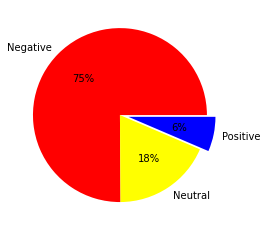

In [27]:
#A pie chart to display the distribution of tweets of each type
import seaborn as sns
import matplotlib.pyplot as plt
datavalues = [18613,4574,1596]
keyvalues = ['Negative', 'Neutral', 'Positive']
#palette_color = sns.color_palette('bright')
explode = [0, 0,0.1]
# plotting data on chart
plt.pie(datavalues, labels=keyvalues, colors=['red','yellow','blue'], explode = explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [44]:
# stripping the tweet column of ! and starting and ending " " marks, " " marks inside text not removed
for i in range(len(data2)):
        pr_twt = data2.loc[i,'tweet'] 
        pr_twt = pr_twt.strip("!")
        pr_twt = pr_twt.strip("!")
        data2.loc[i,'tweet'] = pr_twt 
    
print(data2.head(11))



    Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0            0      3            0                   0        3      2   
1            1      3            0                   3        0      1   
2            2      3            0                   3        0      1   
3            3      3            0                   2        1      1   
4            4      6            0                   6        0      1   
5            5      3            1                   2        0      1   
6            6      3            0                   3        0      1   
7            7      3            0                   3        0      1   
8            8      3            0                   3        0      1   
9            9      3            1                   2        0      1   
10          10      3            0                   3        0      1   

                                                tweet bertalabel  
0    RT @mayasolovely: As a woman you should

In [92]:
import re  #importing regular expressions

print("The list of usernames to be blocked is here")

def getoffenders(data2):  # function which fetches the list of users who pass negative comments as classified by BERTA
    offensive_users = []
    
    for i in range(len(data2)):
        if(data2.loc[i,'bertalabel'] == "Negative"):
            val = data2.loc[i,'tweet'] 
            val = re.findall('@[a-zA-Z\d_]+:',val)  #Usernames start with @ and end with : , here we grab usernames
            
            if(len(val)!= 0):
                val2 = val[0]     # findall returns a list, (size 1 in this case) extracting converts it to string
                val2 = val2.strip('@')
                val2 = val2.strip(':')      #removing @ and : , from string to get the exact usernames
                offensive_users.append(val2)
            
    return offensive_users
        

hatemongers = getoffenders(data2)
nodups =[*set(hatemongers)]  # removing duplicates from hatemongers to display in a list

for person in nodups:   # printing the offender's user handles
    print(person)
       
#s = "mleew17"
print("mleew17" in nodups)

The list of usernames to be blocked is here
The_Realist_Sam
coldhearted9_
iDntLuvHoes
SSickStory
HaiFuckedYoGirl
TheReal_Salmon
1KelliBelle
Chaaaauncey
Tierrraaaaa
prvnceflvcko
MasterSleepy
akelvoneal
beanreturns
IGGYAZALEA
Zach_Dorsey
VillageBae
bl0ndeB1tch_
Aloha_Hoesss
cheyycheyy8
JefDaBest
MidCityAce
prettytreazure
cigarsNscotch
berto__9
junnDem
STARgotthatDOPE
mmpfeiI
BoyGoten
goddesslaney
_ThatGAPeach
BigBagOfScum
HoneyGuwop
shakiraevanss
YUNGRAJEE
SuckMy_John_Son
LaLaGeminiLand
castabignet
XxminijokerXx
slllick_
DawnGoodspeed
InNewZealand
JoeCaroselli1
KathrynBruscoBk
iTAT_uPAY
IKeepitRealer
kanga_ruthie
shelbieperdue
JuniorMaye8
danstfler
crownkingz
Bugalou_
DragonBallDeez
_WhitePonyJr_
C_G_Anderson
UnHoly_Jack
adviljr
northphilliest
scotty160
morgandaylee
TheLittleFella_
Goldie_Brim
retrolivin_cam
MNicolee_
Nombrehere
JLewyville
staciaburbidge
Bayonettes
GeeZzzus
_fckwhatyathink
TylerSteak89
boominator
twayne1010
BwTis
pambesteder
LoganWarner12
BlasianBytch
TheSexFacts101
OITN

KidnapYoGranny
tbhbooty
__marshe
DFcuknAwesum
itssJayda
LiberalPhenom
monnetteee
notesforgirlz
StephGhost
ThatKevinSmith
julialeungg
DirtyEaffiliate
YoShortyMa
Sum_Pfeif
beigegawdd
TyNoDollaSign
tanajiamonay_
SassiSissy
hornyjhb
B1B_Lancer
MattHasTheMusic
JaredLambert21
BCniggas
NightValeRadio
SLIZRD_WIZRD
ZonedMoan
Fewjr
CharlieDayQuote
zekedafreekk
GFCRich
Jaydillz
JasminePore
MonseeHuerta
Wavvvy__
WolfpackAlan
true_east_
Arie_0723
iAintAsianTho
Hudgens_11
blangblangsich
matt_sliwinski
_princessShy
TakeIt_CERIOUS
PoiiNtGuaRd
_RichHomieJuan_
PharaohJas
RIPTheOGKooLAiD
uhfrocircus
djsliime
SomeoneBelow
creoleblood
WavyKirk
YungRalphMaejor
tylerfucks
_prettygirl92
CjayyTaughtHer
BlackChiquitita
ItsKiaraaaa
dirtyimage
iSellGreenCards
ayoooitsjelly
Beard_KW
CallNeeshCakey
FillWerrell
cjduchesneau
PaulConroy
iBChrisMoses
corinne_sauer
xBrandi_
RyanH_Slick
Mdizzle9000
ShabbaCranks
MrPerfect_22
SooMonique
SteffyBallin
TylerReactions
_tiffnasty
mjxcx
ImaPlainJane
J_Dun54
ArmyBulldog20
BitchNi

The list of users to be blocked to be  is visualized here


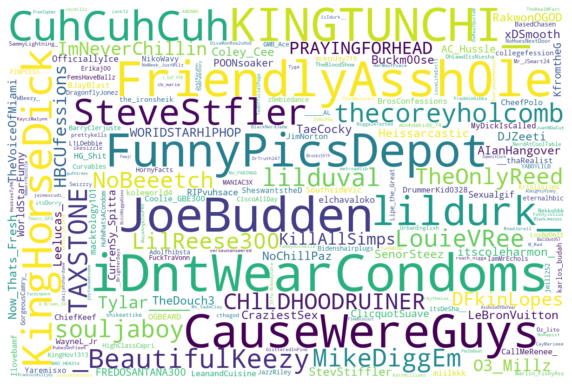

In [89]:
#Visualization of usernames who have posted offensive tweets, word size indicates offenses

print("The list of users to be blocked to be  is visualized here")

neglist = ' '.join(line for line in hatemongers) # joining hatemonger list to create a string

wordcloud = WordCloud(background_color='white',width=1200, height=800,random_state=21, max_font_size=110,collocations=False).generate(neglist)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
            
           